## **Introduction**
This project analyzes the relationship between sleep health, physical activity, and stress levels using the *Sleep Health and Lifestyle* dataset.

The goal is to uncover patterns in sleep quality, stress differences between genders, and correlations between sleep duration and physical activity.

## **Data Overview**
- **Dataset size:** 374 entries
- **Key features:** Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder.

In [1]:
# Load the data
import pandas as pd
import numpy as np

health_data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
display(health_data.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [2]:
# Columns and rows in the data
print(health_data.info())
print(health_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
(374, 13)


## **Data Cleaning & Preprocessing**
- Missing values in the "Sleep Disorder" column were replaced with `"None"`.
- For the column "BMI Category" entries "Normal Weight" were replaced with "Normal" because they are referring to the same category.

In [3]:
# Explore for missing values
print(health_data.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [4]:
# Descriptive statistics
# For numerical data
display(health_data.describe()) 
# For categorical data
display(health_data.value_counts())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Person ID  Gender  Age  Occupation            Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level  BMI Category  Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder
4          Male    28   Sales Representative  5.9             4                 30                       8             Obese         140/90          85          3000         Sleep Apnea       1
290        Female  50   Nurse                 6.1             6                 90                       8             Overweight    140/95          75          10000        Sleep Apnea       1
283        Female  50   Nurse                 6.0             6                 90                       8             Overweight    140/95          75          10000        Sleep Apnea       1
284        Female  50   Nurse                 6.0             6                 90                       8             Overweight    140/95          75          10000        Sleep Apnea       1
285        Female  50   Nurse      

In [5]:
# Inspect categorical type data
print(health_data["Occupation"].unique())
print("="*70)
print(health_data["Gender"].unique())
print(health_data["Gender"].value_counts())
print("="*70)
print(health_data["BMI Category"].unique())
print("="*70)
print(health_data["Sleep Disorder"].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['Male' 'Female']
Gender
Male      189
Female    185
Name: count, dtype: int64
['Overweight' 'Normal' 'Obese' 'Normal Weight']
[nan 'Sleep Apnea' 'Insomnia']


In [6]:
# Replace the inconsistent values -> "Normal Weight" to "Normal"
health_data["BMI Category"] = health_data["BMI Category"].replace({"Normal Weight":"Normal"})
print(health_data["BMI Category"].unique())

['Overweight' 'Normal' 'Obese']


In [7]:
# Replace nan with "None" in the sleeping disorder column
health_data["Sleep Disorder"] = health_data["Sleep Disorder"].replace({np.nan:"None"})
print(health_data["Sleep Disorder"].unique())

['None' 'Sleep Apnea' 'Insomnia']


In [8]:
# Check whether there are still considered missing values
print(health_data["Sleep Disorder"].isnull().sum())

0


* Distribution of key variables (summary statistics)

In [9]:
print(health_data["Sleep Duration"].describe())
print(health_data["Physical Activity Level"].describe())
print(health_data["Stress Level"].describe())
print(health_data["Heart Rate"].describe())

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64
count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64
count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64
count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64


## **Data Analysis**
**What is the relationship between sleep duration and physical activity level?**
- Generate a scatterplot to inspect the direction and strenght of the relationship.
- Inspect for possible outliers.
- Correlational analysis will be conducted to find the value for *Pearson's r* and a significance test will be performed.

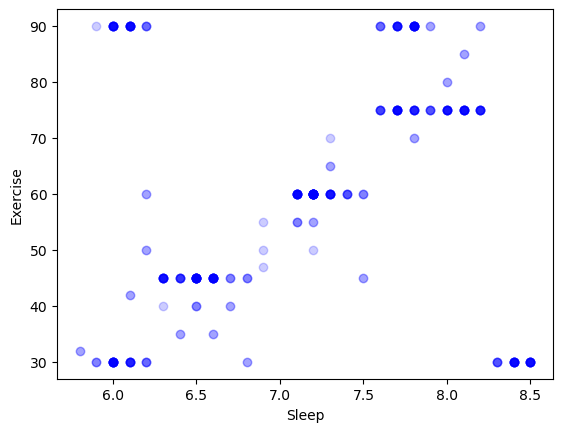

In [10]:
# Scatterplot for sleep duration and physical acticvity level
import matplotlib.pyplot as plt
x_sleep_dur = health_data["Sleep Duration"]
y_active = health_data["Physical Activity Level"]

plt.scatter(x_sleep_dur, y_active, alpha=0.2, color="blue")
plt.xlabel("Sleep")
plt.ylabel("Exercise")
plt.show()

**Conclusion based on scatterplot**
* Based on the scatterplot the correlation between sleep duration and physical activity level appears to be positive and strong.
* There also appear to be outliers in the data, which can affect the value of the *Pearson's r*. The next step is to find the outliers and remove them for more robust results.

In [11]:
# Find the outliers of the females
outliers_female = health_data[(health_data["Gender"] == "Female") &
(health_data["Physical Activity Level"].isin([30,90])) &
((health_data["Sleep Duration"].between(5.9,6.1)) | (health_data["Sleep Duration"].between(8.0,8.5)))   
]
display(outliers_female)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
265,266,Female,48,Nurse,5.9,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
268,269,Female,49,Nurse,6.0,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
269,270,Female,49,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
270,271,Female,49,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
271,272,Female,49,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,337,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None
337,338,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None
338,339,Female,54,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None
341,342,Female,56,Doctor,8.2,9,90,3,Normal,118/75,65,10000,None


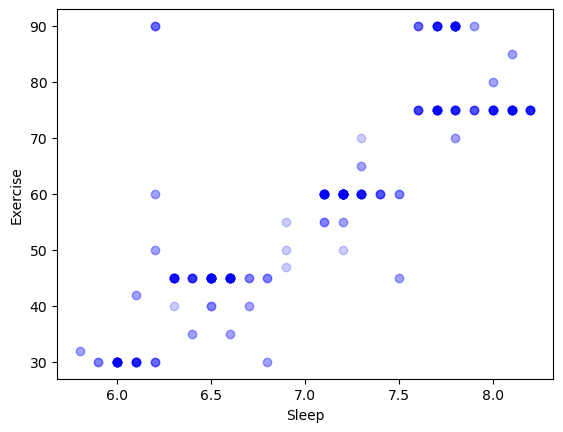

r = 0.86
p = 0.0
The correlation is significant at the 5% level.


In [12]:
# Remove female outliers
health_data_cleaned = health_data.drop(outliers_female.index)

# Scatterplot for sleep duration and physical acticvity level
x_sleep_dur = health_data_cleaned["Sleep Duration"]
y_active = health_data_cleaned["Physical Activity Level"]

plt.scatter(x_sleep_dur, y_active, alpha=0.2, color="blue")
plt.xlabel("Sleep")
plt.ylabel("Exercise")
plt.show()

# Pearson's r correlation sleep duration and physical activity level
from scipy.stats import pearsonr

r, p_value = pearsonr(health_data_cleaned["Sleep Duration"], health_data_cleaned["Physical Activity Level"])
print("r = {}".format(round(r,3)))
print("p = {}".format(round(p_value,3)))

if p_value <0.05:
    print("The correlation is significant at the 5% level.")
else:
    print("The correlation is not significant.")


**Final conlusions**
* The outliers have been located and removed.
* The scatterplot was generated again to make sure that the outliers have been removed.
* Correlational analysis was performed with value for *r = 0.86* and *p = 0.0*. This result suggests that there is a strong positive relationship between sleep duration and physical activity level. The relationship was also found to be significant, thus if sleep duration increases, so does the physical activity level of the person and vice versa.

**Summary statistics after outlier removal**
* The number of females decreased.
* There is almost no change in the statistics for sleep duration, stress level and heart rate.
* The Standard Deviation for physical activity level became smaller, indicated less spread out points.

In [13]:

print(health_data_cleaned["Gender"].unique())
print(health_data_cleaned["Gender"].value_counts())
print("="*50)
print(health_data_cleaned["Sleep Duration"].describe())
print("="*50)
print(health_data_cleaned["Physical Activity Level"].describe())
print("="*50)
print(health_data_cleaned["Stress Level"].describe())
print("="*50)
print(health_data_cleaned["Heart Rate"].describe())

['Male' 'Female']
Gender
Male      189
Female    123
Name: count, dtype: int64
count    312.000000
mean       7.090064
std        0.686478
min        5.800000
25%        6.500000
50%        7.200000
75%        7.700000
max        8.200000
Name: Sleep Duration, dtype: float64
count    312.000000
mean      59.198718
std       18.471293
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64
count    312.000000
mean       5.410256
std        1.593281
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64
count    312.000000
mean      70.294872
std        3.933888
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64


**What is the relationship between sleep quality and stress level?**
- Generate a scatterplot to inspect the direction and strenght of the relationship.
- Correlational analysis will be conducted to find the value for *Pearson's r* and a significance test will be performed.

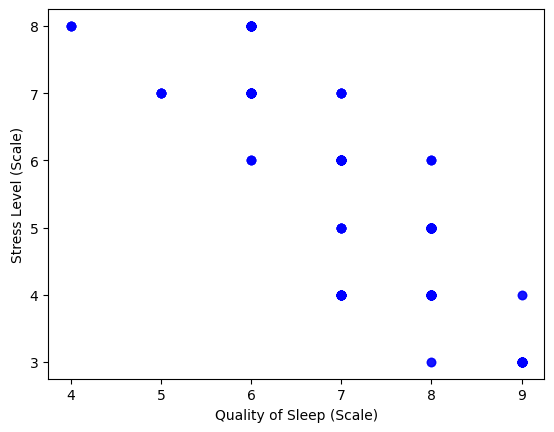

In [14]:
# Scatterplot for sleep duration and stress level (CLEANED DATA)
x_qual_sl = health_data_cleaned["Quality of Sleep"]
y_sl = health_data_cleaned["Stress Level"]

plt.scatter(x_qual_sl, y_sl, alpha=0.7, color="blue")
plt.xlabel("Quality of Sleep (Scale)")
plt.ylabel("Stress Level (Scale)")
plt.show()

**Conclusion based on scatterplot**
* Based on the scatterplot the correlation between sleep quality and stress level appears to be negative and strong.

In [15]:
# Pearson's r (sleep quality - stress level)
r_ss, p_val = pearsonr(health_data_cleaned["Quality of Sleep"], health_data_cleaned["Stress Level"])
print("r = {}".format(round(r_ss,3)))
print("p = {}".format(round(p_val,3)))

if p_val <0.05:
    print("The correlation is significant at the 5% level.")
else:
    print("The correlation is not significant.")

r = -0.865
p = 0.0
The correlation is significant at the 5% level.


**Final Conclusions**
* Correlational analysis was performed with value for *r = -0.865* and *p = 0.0*. This result suggests that there is a strong negative relationship between sleep quality and stress level. The relationship was also found to be significant, thus if sleep quality decreases, stress level increase and if stress levels decrease, sleep quality will increase.

**What is the realionship between sleep quality and stress level for males and for females?**
* Generate a scatterplot to inspect the realtion for both genders.
* Correlational analysis will be conducted to find the value for *Pearson's r* and a significance test will be performed.

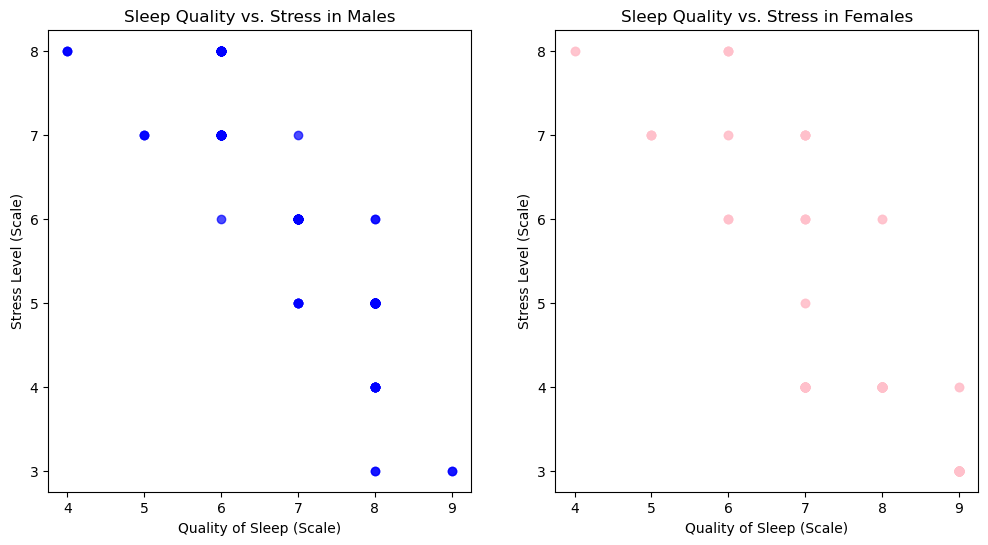

In [16]:
# Scatterplot (Quality - Stress, Male vs. Female)
male = health_data_cleaned[health_data_cleaned["Gender"]=="Male"]
female = health_data_cleaned[health_data_cleaned["Gender"]=="Female"]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(male["Quality of Sleep"], male["Stress Level"], alpha=0.7, color="blue")
plt.xlabel("Quality of Sleep (Scale)")
plt.ylabel("Stress Level (Scale)")
plt.title("Sleep Quality vs. Stress in Males")

plt.subplot(1,2,2)
plt.scatter(female["Quality of Sleep"], female["Stress Level"], alpha=0.7, color="pink")
plt.xlabel("Quality of Sleep (Scale)")
plt.ylabel("Stress Level (Scale)")
plt.title("Sleep Quality vs. Stress in Females")

plt.show()

**Conclusions based on scatterplot**
* For both genders we see a negative relationship, which is consistent with the general trend we saw in the previous analysis.

In [17]:
# Pearson's r (males)
r_male, p_male = pearsonr(male["Quality of Sleep"], male["Stress Level"])

print("r (males)= {}".format(round(r_male,3)))
print("p (males)= {}".format(round(p_male,3)))

if p_male <0.05:
    print("The correlation is significant at the 5% level.")
    print("="*50)
else:
    print("The correlation is not significant.")
    
# Pearson's r (females)
r_female, p_female = pearsonr(female["Quality of Sleep"], female["Stress Level"])

print("r (females)= {}".format(round(r_female,3)))
print("p (females)= {}".format(round(p_female,3)))

if p_female <0.05:
    print("The correlation is significant at the 5% level.")
else:
    print("The correlation is not significant.")

r (males)= -0.899
p (males)= 0.0
The correlation is significant at the 5% level.
r (females)= -0.829
p (females)= 0.0
The correlation is significant at the 5% level.


**Final Conclusions**
* Correlational analysis was performed with value for *r (males) = -0.899* and *p (males) = 0.0*. This result suggests that there is a strong negative relationship between sleep quality and stress level for males. The relationship was also found to be significant, thus if sleep quality in males decreases, stress level in males increases and if stress levels in males decrease, sleep quality will increase.
* For the females the results were similar: *r (females) = -0.829* and *p (females) = 0.0*. The strong negative relationship is also present for the females.

**Do males and females have on average the same sleep quality?**
* Perform a two-sided independent sample t-test to investigate whether the sleep quality of males and females differs.
* Calculate an effect size.
* Visualize the results using a boxplot.

In [18]:
# Sleep quality between genders
from scipy.stats import ttest_ind

m_sl = male["Quality of Sleep"]
f_sl = female["Quality of Sleep"]
m_avg = male["Quality of Sleep"].mean()
f_avg = female["Quality of Sleep"].mean()
print("Mean sleep (males) = {}".format(round(m_avg,3)))
print("Mean sleep (females) = {}".format(round(f_avg,3)))
print("="*40)

t_st, pv = ttest_ind(m_sl, f_sl)

print("t = {}".format(round(t_st,3)))
print("p = {}".format(round(pv,3)))

if pv <0.05:
    print("Result is significant at the 5% level.")
else:
    print("Result is not significant at the 5% level.")

Mean sleep (males) = 6.968
Mean sleep (females) = 7.675
t = -5.733
p = 0.0
Result is significant at the 5% level.


In [19]:
# Calculate the Cohen's d for to check for practical significance
pooled_std = np.sqrt(((len(male["Quality of Sleep"]) - 1) * male["Quality of Sleep"].var() +
                      (len(female["Quality of Sleep"]) - 1) * female["Quality of Sleep"].var()) /
                     (len(male["Quality of Sleep"]) + len(female["Quality of Sleep"]) - 2))

cohen_d = (female["Quality of Sleep"].mean() - male["Quality of Sleep"].mean()) / pooled_std
print(f"Cohen's d = {round(cohen_d,3)}")

Cohen's d = 0.664


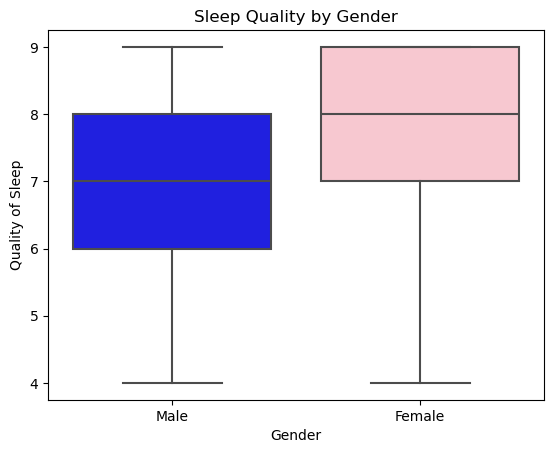

In [20]:
# Box plot between the two genders
import seaborn as sns

custom_palette = {"Male": "blue", "Female": "pink"}

sns.boxplot(data=health_data_cleaned, x="Gender", y="Quality of Sleep", palette=custom_palette)
plt.title("Sleep Quality by Gender")
plt.show()

**Final Conclusions**
* The results of the t-test were significant (*t = -5.733, p = 0.0*), suggesting that females experience on average higher levels of sleep quality.
* The effect size (*d = 0.664*) suggests that gender has a moderate impact on sleep quality.
* The boxplot makes the results clearer by showing that females have higher sleep quality than males.

**Which gender experiences on average more stress - males or females?**
- find the average stress level for both gender
- conduct a t-test to check whether the differences in the mean value is significant
- conduct an effect size test (Cohen's d) to check for practical significance.

In [21]:
# Average stress level based on gender
avg_stress = health_data_cleaned.groupby("Gender")["Stress Level"].mean()
print(avg_stress)
print("="*40)
avg_stress_male = health_data_cleaned.loc[health_data_cleaned["Gender"]=="Male", "Stress Level"].mean()
avg_stress_female = health_data_cleaned.loc[health_data_cleaned["Gender"]=="Female", "Stress Level"].mean()
print("Average stress level of males: {}".format(round(avg_stress_male,3)))
print("Average stress level of females: {}".format(round(avg_stress_female,3)))

Gender
Female    4.382114
Male      6.079365
Name: Stress Level, dtype: float64
Average stress level of males: 6.079
Average stress level of females: 4.382


In [22]:
# Are females more or less stressed then males? (Perform a t-test)
from scipy.stats import ttest_ind
m_stress = male["Stress Level"]
f_stress = female["Stress Level"]

t_stat, p = ttest_ind(m_stress, f_stress)

print("t = {}".format(round(t_stat,3)))
print("p = {}".format(round(p,3)))

if p <0.05:
    print("Result is significant at the 5% level.")
else:
    print("Result is not significant at the 5% level.")

t = 10.759
p = 0.0
Result is significant at the 5% level.


In [23]:
# Calculate the Cohen's d for to check for practical significance
pooled_std = np.sqrt(((len(male["Stress Level"]) - 1) * male["Stress Level"].var() +
                      (len(female["Stress Level"]) - 1) * female["Stress Level"].var()) /
                     (len(male["Stress Level"]) + len(female["Stress Level"]) - 2))

cohen_d = (female["Stress Level"].mean() - male["Stress Level"].mean()) / pooled_std
print(f"Cohen's d = {round(cohen_d,3)}")

Cohen's d = -1.246


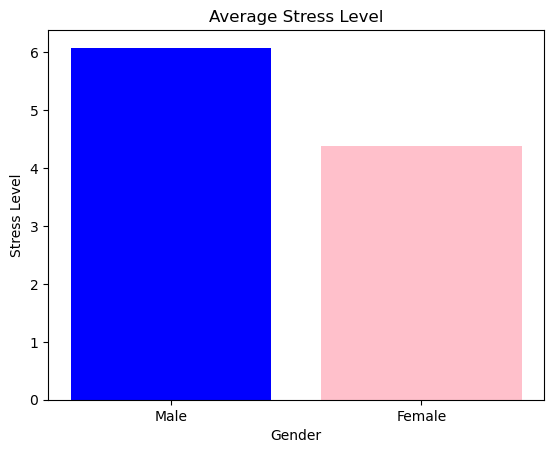

In [24]:
# Bar plot of stress level in genders
import matplotlib.pyplot as plt
y_stress = [avg_stress_male, avg_stress_female]
x_stress = np.arange(len(y_stress))

plt.bar(x_stress, y_stress, color=["blue", "pink"])
plt.xticks(x_stress, ["Male", "Female"])
plt.xlabel("Gender")
plt.ylabel("Stress Level")
plt.title("Average Stress Level")
plt.show()

**Final Conclusions**
* The results of the t-test were significant (*t = 10.759, p = 0.0*), suggesting that males experience on average higher stress levels.
* The effect size (*d = 1.246*) suggests that gender has a large impact on stress level.
* The bargraph makes the results clearer by showing that males have higher sleep levels than females.

**What are the stress levels given different occupations and are those differences significant?**
- Split the data based on occupation -> make occupation categories
- Calculate the mean stress level for each of the new categories
- Compare the means of each category
  * Hull hypothesis (H0): all groups means are equal. (No difference in stress level between the different occupation categories.)
  * H1: at least one group mean differs from the rest. (Stress level is different for at least one occupation category.)
- Check whether the assumptions for an ANOVA test are violated.
  * Independent observations
  * Normally distributed errors
  * Equal population variances

In [25]:
# What are the stress levels across different occupations?
print(health_data_cleaned["Occupation"].value_counts())
print("="*30)

# Because the dataset is not balanced, make occupation categories
def cat_occup(occupation):
    if occupation in ["Nurse", "Doctor"]:
        return "Healthcare"
    elif occupation in ["Engineer", "Software Engineer", "Scientist"]:
        return "Technical"
    elif occupation in ["Salesperson", "Sales Representative", "Manager", "Accountant"]:
        return "Business and Sales"
    elif occupation in ["Teacher", "Lawyer"]:
        return "Education and Law"
    else:
        return "Other"

health_data_cleaned["Occupation Group"] = health_data_cleaned["Occupation"].apply(cat_occup)
print(health_data_cleaned["Occupation Group"].value_counts())
print("="*30)

# Average stress level per category
avg_stress_per_group = health_data_cleaned.groupby("Occupation Group")["Stress Level"].mean().sort_values()
print(avg_stress_per_group)

Occupation
Doctor                  69
Lawyer                  47
Nurse                   45
Teacher                 40
Accountant              37
Salesperson             32
Engineer                31
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
Occupation Group
Healthcare            114
Education and Law      87
Business and Sales     72
Technical              39
Name: count, dtype: int64
Occupation Group
Education and Law     4.816092
Technical             5.153846
Healthcare            5.728070
Business and Sales    5.763889
Name: Stress Level, dtype: float64


- Check for assumtion violation:
  * The observations are independent from each other. No repeated measures.
  * In case of violation of the normal distribution of errors, the ANOVA is still robust because the sample size per group is larger than 30.
  * Levene's test for equality of variances

In [26]:
from scipy.stats import levene

occupation_groups = ["Healthcare", "Education and Law", "Technical", "Business and Sales"]

stress_data = []

for group in occupation_groups:
    stress_levels = health_data_cleaned[health_data_cleaned["Occupation Group"] == group]["Stress Level"].dropna()
    stress_data.append(stress_levels)

stat_lev, p_val_lev = levene(*stress_data)
print(f"Levene's Test Statistic: {round(stat_lev, 6)}")
print(f"Levene's Test p-value: {round(p_val_lev, 6)}")
    

Levene's Test Statistic: 17.98565
Levene's Test p-value: 0.0


* Given the result of the Levene's test, we can reject the null hypothesis of equal population variance. This means that ANOVA cannot be performed because the assumption is violated and the check for robustness also fails (the lowest sample size is 39, which is more the 1.5 time smaller than the largest sample size 114).
* This means that we have to perform a Welch's Anova which does not have equal variances as an assumption.

In [27]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [28]:
# Perform Walch's ANOVA
import pingouin as pg

welch_anova = pg.welch_anova(dv="Stress Level", between ="Occupation Group", data = health_data_cleaned)

print(welch_anova)

             Source  ddof1       ddof2          F         p-unc       np2
0  Occupation Group      3  126.078715  11.932463  6.256063e-07  0.068141


* Based on the results of the test, we can reject the H0, because there is at least one group mean that differs from the rest.
* To find which groups differ from each other, we have to perform a post-hoc test: Games-Howell post-hoc test, which also accounts for unequal variances.

In [29]:
posthoc = pg.pairwise_gameshowell(dv="Stress Level", between="Occupation Group", data=health_data_cleaned)

print(posthoc)

                    A                  B   mean(A)   mean(B)      diff  \
0  Business and Sales  Education and Law  5.763889  4.816092  0.947797   
1  Business and Sales         Healthcare  5.763889  5.728070  0.035819   
2  Business and Sales          Technical  5.763889  5.153846  0.610043   
3   Education and Law         Healthcare  4.816092  5.728070 -0.911978   
4   Education and Law          Technical  4.816092  5.153846 -0.337754   
5          Healthcare          Technical  5.728070  5.153846  0.574224   

         se         T          df      pval    hedges  
0  0.198408  4.777016  101.579484  0.000035  0.800406  
1  0.260523  0.137488  177.964616  0.999069  0.019378  
2  0.268584  2.271331   92.121741  0.112334  0.422555  
3  0.206613 -4.413936  154.451712  0.000111 -0.566620  
4  0.216689 -1.558702   51.995368  0.410815 -0.353022  
5  0.274701  2.090359  107.376321  0.162837  0.308594  


* Based from the posthoc test we can make the following conclusions:
  - Business and Sales report significantly higher stress levels than Education and Law, with an effect size of 0.80, p < .05
  - Education and Law report significantly lower stress levels than Healthcare, with an effect size of 0.57, p < .05

**Final Conclusions**
* Given the violation of the equal variances assumption, ANOVA was not appropriate to be conducted, thus the Walch's ANOVA was performed to account for the unequal variances.
* The results were significant, thus the following step would be to check which categories significantly differ from each other in terms of stress levels.
* The final results suggests that job in the category of "Business and Sales" experience on average more stress (*$\overline {X}$=5.764*) than in "Education and Law", and job in "Healthcare" experience on average higher stress levels (*$\overline {X}$=5.728*) than "Education and Law".

**What is the relationship between stress level and heart rate?**
- Generate a scatterplot to inspect the direction and strenght of the relationship.
- Correlational analysis will be conducted to find the value for *Pearson's r* and a significance test will be performed.

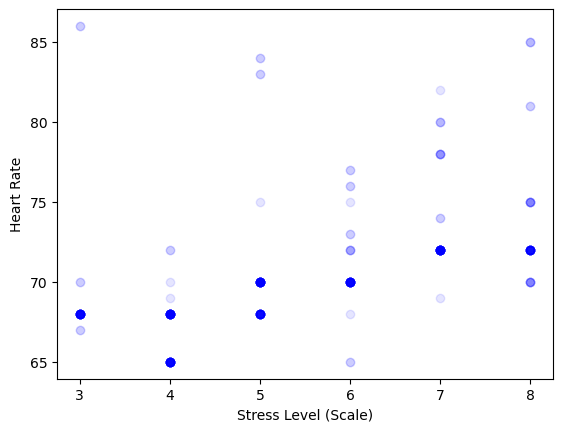

r = 0.544
p = 0.0
The correlation is significant at the 5% level.


In [30]:

# Scatterplot to see whether there is a relationship
x_shr = health_data_cleaned["Stress Level"]
y_shr = health_data_cleaned["Heart Rate"]

plt.scatter(x_shr, y_shr, alpha=0.1, color="blue")
plt.xlabel("Stress Level (Scale)")
plt.ylabel("Heart Rate")
plt.show()

r_shr, p_shr = pearsonr(health_data_cleaned["Stress Level"], health_data_cleaned["Heart Rate"])

print("r = {}".format(round(r_shr,3)))
print("p = {}".format(round(p_shr,3)))

if p_shr <0.05:
    print("The correlation is significant at the 5% level.")
else:
    print("The correlation is not significant.")

* Given the scatterplot we can see a positive relationship.
* After performing the correlation analysis we find evidence supporting a strong positive correlation between stress level and heart rate.

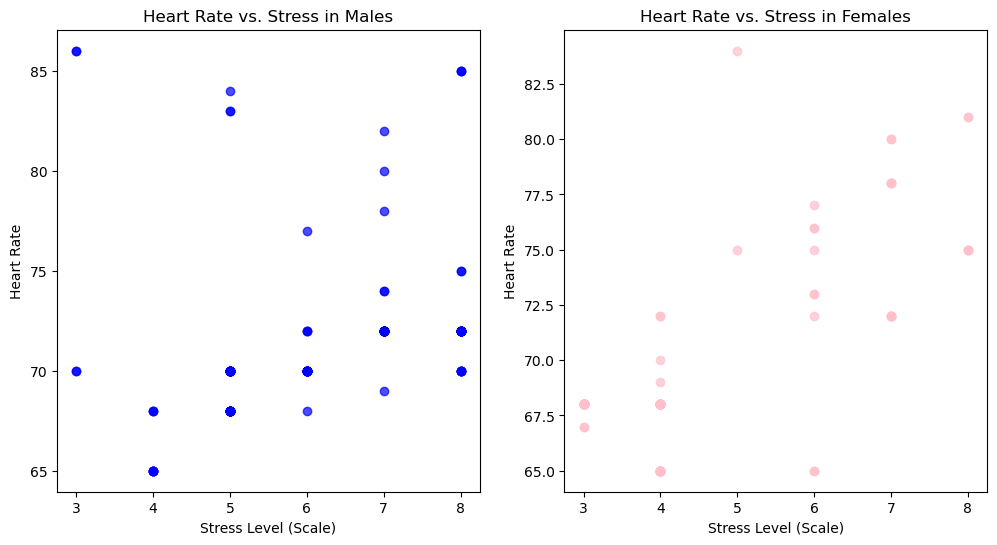

In [31]:
# Is this relation kept if we look at the two genders?
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(male["Stress Level"], male["Heart Rate"], alpha=0.7, color="blue")
plt.ylabel("Heart Rate")
plt.xlabel("Stress Level (Scale)")
plt.title("Heart Rate vs. Stress in Males")

plt.subplot(1,2,2)
plt.scatter(female["Stress Level"], female["Heart Rate"], alpha=0.7, color="pink")
plt.ylabel("Heart Rate")
plt.xlabel("Stress Level (Scale)")
plt.title("Heart Rate vs. Stress in Females")

plt.show()

In [32]:
# Find the r for both genders on stress - HR relation
# Pearson's r (males)
r_male_shr, p_male_shr = pearsonr(male["Stress Level"], male["Heart Rate"])

print("r (males) = {}".format(round(r_male_shr,3)))
print("p (males) = {}".format(round(p_male_shr,3)))

if p_male_shr <0.05:
    print("The correlation is significant at the 5% level.")
    print("="*50)
else:
    print("The correlation is not significant.")
    print("="*50)
    
# Pearson's r (females)
r_female_shr, p_female_shr = pearsonr(female["Stress Level"], female["Heart Rate"])

print("r (females) = {}".format(round(r_female_shr,3)))
print("p (females) = {}".format(round(p_female_shr,3)))

if p_female_shr <0.05:
    print("The correlation is significant at the 5% level.")
else:
    print("The correlation is not significant.")

r (males) = 0.322
p (males) = 0.0
The correlation is significant at the 5% level.
r (females) = 0.729
p (females) = 0.0
The correlation is significant at the 5% level.


**Final Conclusions**
* To investigate whether the general trend will be the same for both males and females, a correlational analysis was performed.
* Based on the scatterplot for both gender we can see that the relationship continues being positive. Thus, increase in stress levels can lead to increase in heart rate and vice versa.
* Correlational analysis was performed with value for *r (males) = 0.322* and *p (males) = 0.0*. This result suggests that there is a weak positive relationship between heart rate and stress level for males. The relationship was also found to be significant.
* For the females the results were: *r (females) = 0.729* and *p (females) = 0.0*. The strong positive relationship indicates that increase in stress levels is coupled with increase in heart rate.